# SegDup Only Simulation Analysis

Comparing results between standard and self-mapped approaches.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.patches import Patch
from matplotlib import font_manager
from matplotlib.transforms import Bbox
from pypdf import PdfWriter
import json
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

# Set title
experiment_title = "Only segdup"
figure_dir = "/Users/stacy/Documents/GitHub/nova/figures/alu_segdups"
if not os.path.exists(figure_dir):
    os.makedirs(figure_dir)
figure_path_prefix = f"{figure_dir}/{experiment_title.replace(" ", "_").lower()}"
pdf_files = []

SINGLE_COL_WIDTH = 3.5  # inches
DOUBLE_COL_WIDTH = 7.0  # inches
MAX_HEIGHT = 9.0  # typical max height for a full page

# Set consistent DPI for both display and saving
SAVE_DPI = 300  # publication quality
mpl.rcParams['figure.dpi'] = 100  # for display
mpl.rcParams['savefig.dpi'] = SAVE_DPI

# Set style
sns.set_context("notebook", font_scale=1.2)
sns.set_style('whitegrid')

# save stock defaults for reference
default_font_family = plt.rcParams['font.family']
default_fonts = plt.rcParams['font.sans-serif'] 

# set default font 
font_path = '/System/Library/Fonts/HelveticaNeue.ttc'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.sans-serif'] = prop.get_name()

# set figure save paths
figure_dir = "/Users/stacy/Documents/Writing/spermSV/Figures/plots"
supp_dir = "/Users/stacy/Documents/Writing/spermSV/Supplement/Figures"
if not os.path.exists(figure_dir):
    os.makedirs(figure_dir)
if not os.path.exists(supp_dir):
    os.makedirs(supp_dir)

# Load the JSON data
hg38_path = "/Users/stacy/Documents/GitHub/nova/experiments/alu_segdups/only_segdup/nova_analysis_summary.json"
self_path = "/Users/stacy/Documents/GitHub/nova/experiments/alu_segdups_self_map/only_segdup/nova_analysis_summary.json"

with open(hg38_path, 'r') as f:
    standard_json = json.load(f)

with open(self_path, 'r') as f:
    self_map_json = json.load(f)

# Load CSV data
standard_df = pd.read_csv('../experiments/alu_segdups/only_segdup/nova_analysis_summary.csv')
self_map_df = pd.read_csv('../experiments/alu_segdups_self_map/only_segdup/nova_analysis_summary.csv')

# Add experiment type column for combined analysis
standard_df['experiment'] = 'Standard'
self_map_df['experiment'] = 'Self-mapped'
combined_df = pd.concat([standard_df, self_map_df], ignore_index=True)

# Add insertion type f1 score
combined_df['f1_score'] = (2*(combined_df['precision'] * combined_df['recall'])) / (100*(combined_df['precision'] + combined_df['recall']))

# Define color palettes
standard_color = 'lightblue'
self_mapped_color = '#328ba8'

# Seaborn palette dictionary
exp_palette = {'Standard': standard_color, 'Self-mapped': self_mapped_color}

overall_melted_df = combined_df.melt(
    id_vars=['experiment'],
    value_vars=['overall_recall', 'overall_precision', 'overall_f1_score'],
    var_name='metric',
    value_name='percentage').drop_duplicates()

instype_melted_df = combined_df.melt(
    id_vars=['insertion_type', 'experiment'],
    value_vars=['recall', 'precision', 'f1_score'],
    var_name='metric',
    value_name='percentage')


# Comparing call counts between "self" and "standard" map

```
# self-map
(base) the-wired:nova stacy$ zcat < experiments/alu_segdups_self_map/no_segdup/nova_base.vcf.gz | grep -v "^#" | wc -l
   18808

(base) the-wired:nova stacy$ zcat < experiments/alu_segdups/no_segdup/nova_base.vcf.gz | grep -v "^#" | wc -l
   85707
```

In [25]:
overall_melted_df

,experiment,metric,percentage
0,Standard,overall_recall,65.68
12,Self-mapped,overall_recall,59.94
23,Standard,overall_precision,93.05
35,Self-mapped,overall_precision,90.19
46,Standard,overall_f1_score,0.77
58,Self-mapped,overall_f1_score,0.72


## 1. Recall and Precision

Text(0.5, 0.92, 'Only segdup')

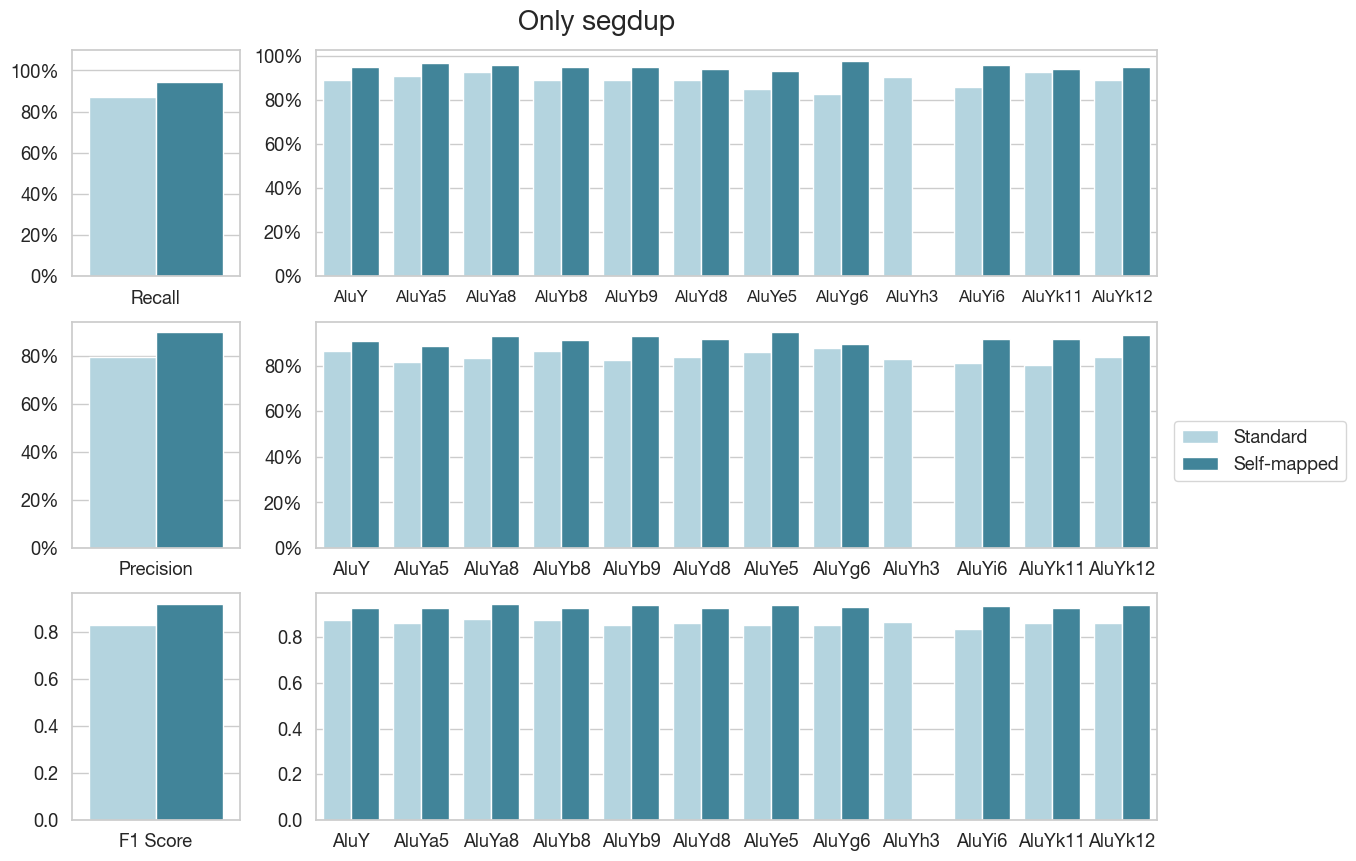

In [4]:
overall_melted_df = combined_df.melt(
    id_vars=['experiment'],
    value_vars=['overall_recall', 'overall_precision', 'overall_f1_score'],
    var_name='metric',
    value_name='percentage').drop_duplicates()

instype_melted_df = combined_df.melt(
    id_vars=['insertion_type', 'experiment'],
    value_vars=['recall', 'precision', 'f1_score'],
    var_name='metric',
    value_name='percentage')

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(14,10), gridspec_kw={'width_ratios': [1, 5], 'wspace': 0.15})

# # Set tick label size to 12 for all subplots
# for row in ax:
#     for subplot in row:
#         subplot.tick_params(axis='both', labelsize=12)

sns.barplot(overall_melted_df.query('metric == "overall_recall"'), x='metric', y='percentage', hue='experiment',
            palette=exp_palette, ax=ax[0, 0], legend = False)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('')
ax[0,0].set_xticklabels(["Recall"])
ax[0,0].set_ylim(0, 110)
ax[0,0].yaxis.set_major_formatter(mtick.PercentFormatter())

sns.barplot(overall_melted_df.query('metric == "overall_precision"'), x='metric', y='percentage', hue='experiment',
            palette=exp_palette, ax=ax[1, 0], legend = False)
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('')
ax[1,0].set_xticklabels(["Precision"]) 
ax[1,0].yaxis.set_major_formatter(mtick.PercentFormatter())

sns.barplot(overall_melted_df.query('metric == "overall_f1_score"'), x='metric', y='percentage', hue='experiment',
            palette=exp_palette, ax=ax[2, 0], legend = False)
ax[2,0].set_xlabel('')
ax[2,0].set_ylabel('')
ax[2,0].set_xticklabels(["F1 Score"])

sns.barplot(instype_melted_df.query('metric == "recall"'), x='insertion_type', y='percentage', hue='experiment',
            palette=exp_palette, ax=ax[0, 1], legend = False)
ax[0,1].tick_params(axis='x', labelsize=12)
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels())
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].yaxis.set_major_formatter(mtick.PercentFormatter())

sns.barplot(instype_melted_df.query('metric == "precision"'), x='insertion_type', y='percentage', hue='experiment',
            palette=exp_palette, ax=ax[1, 1])
ax[1,1].tick_params(axis='x')
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels())
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')
ax[1,1].yaxis.set_major_formatter(mtick.PercentFormatter())
ax[1,1].legend(loc = 'upper left', bbox_to_anchor = (1.01, 0.6))

sns.barplot(instype_melted_df.query('metric == "f1_score"'), x='insertion_type', y='percentage', hue='experiment',
            palette=exp_palette, ax=ax[2, 1], legend = False)
ax[2,1].tick_params(axis='x')
ax[2,1].set_xticklabels(ax[2,1].get_xticklabels())
ax[2,1].set_xlabel('')
ax[2,1].set_ylabel('')

plt.suptitle(f"{experiment_title}", y = 0.92, fontsize = 20)

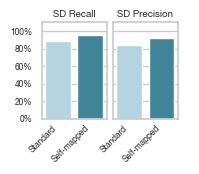

In [11]:
fig, ax = plt.subplots(ncols=2, figsize = (SINGLE_COL_WIDTH*0.5, 1.25), gridspec_kw={'wspace': 0.1}, sharey = True)

sns.barplot(combined_df, x='experiment', y='recall', hue='experiment', errorbar = None,
            palette=exp_palette, ax=ax[0], legend = False)
ax[0].xaxis.set_label_position('top')
ax[0].set_xlabel('SD Recall', fontsize=7)
ax[0].tick_params(axis='x', length=0, labelsize=6, rotation = 45)
ax[0].set_xticklabels(ax[0].get_xticklabels(), horizontalalignment='right')
ax[0].tick_params(axis='y', pad = 1, labelsize=6)
ax[0].set_ylabel('')
ax[0].set_ylim(0, 110)
ax[0].set_yticks([0, 20, 40, 60, 80, 100])
ax[0].yaxis.set_major_formatter(mtick.PercentFormatter())

sns.barplot(combined_df, x='experiment', y='precision', hue='experiment', errorbar = None,
            palette=exp_palette, ax=ax[1], legend = False)
ax[1].xaxis.set_label_position('top')
ax[1].set_xlabel('SD Precision', fontsize=7)
ax[1].tick_params(axis='x', length=0, labelsize=6, rotation = 45)
ax[1].set_xticklabels(ax[1].get_xticklabels(), horizontalalignment='right')
ax[1].tick_params(axis='y', length = 2, labelsize=6)
ax[1].set_ylabel('')
ax[1].set_ylim(0, 110)
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter())

legend = ax[1].legend(loc = 'upper left', bbox_to_anchor = (1.01, 0.6), frameon = False, fontsize=6)

# plt.suptitle(f"Segmental duplications", y = 1.01, fontsize=9)
plt.savefig(f"{figure_dir}/simulation_only_segdup_performance.png", 
            dpi = 300,
            transparent = True,
            bbox_inches = 'tight')

plt.savefig(f"{figure_dir}/simulation_only_segdup_performance.pdf", 
            transparent = True,
            bbox_inches = 'tight')

## 2. False Positive Analysis

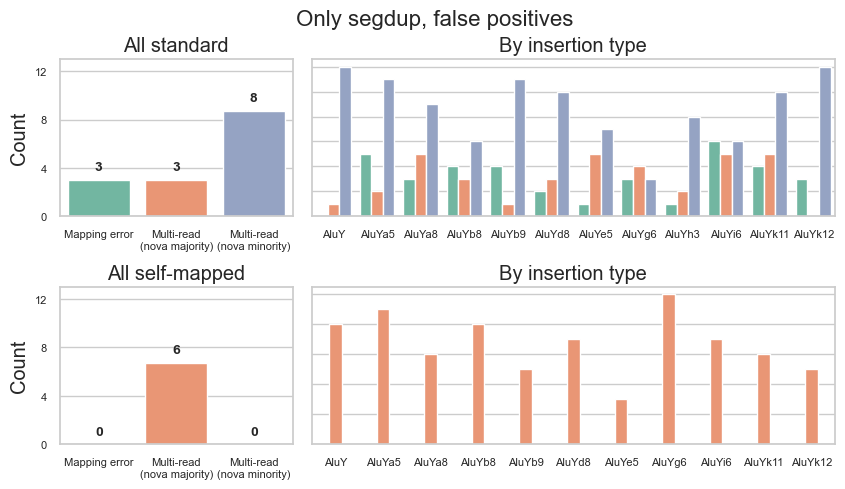

In [27]:
# Prepare false positive data
fp_cols = ['fp_mapping_errors', 'fp_multi_read_majority', 'fp_multi_read_minority']
fp_melted = combined_df.melt(
    id_vars=['insertion_type', 'experiment'],
    value_vars=fp_cols,
    var_name='fp_type',
    value_name='count'
)

# Clean up labels
fp_melted['fp_type'] = fp_melted['fp_type'].map({
    'fp_mapping_errors': 'Mapping error',
    'fp_multi_read_majority': 'Multi-read\n(nova majority)',
    'fp_multi_read_minority': 'Multi-read\n(nova minority)'
})

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5), gridspec_kw={'width_ratios': [1, 2.25], 'wspace': 0.05, 'hspace': 0.45})

for row in ax:
    for subplot in row:
        subplot.tick_params(axis='both', labelsize=8)

g1 = sns.barplot(fp_melted.query("experiment == 'Standard'"), x='fp_type', y='count', hue='fp_type',
            palette='Set2', ax=ax[0, 0], errorbar = None, legend = False)
ax[0,0].set_title('All standard')
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Count')    
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels())
ax[0,0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: int(x)))
ax[0,0].set_ylim(0, 13)
ax[0,0].set_yticks(range(0, 14, 4))
# Add count annotations
for p in g1.patches:
    g1.annotate(format(int(p.get_height()), 'd'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize = 10,
                fontweight = '600')

g2 = sns.barplot(fp_melted.query("experiment == 'Self-mapped'"), x='fp_type', y='count', hue='fp_type',
            palette='Set2', ax=ax[1, 0], errorbar = None, legend = False)
ax[1,0].set_title('All self-mapped')
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('Count')    
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels())
ax[1,0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: int(x)))
ax[1,0].set_ylim(0, 13)
ax[1,0].set_yticks(range(0, 14, 4))
# Add count annotations
for p in g2.patches:
    g2.annotate(format(int(p.get_height()), 'd'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize = 10,
                fontweight = '600')

sns.barplot(fp_melted.query("experiment == 'Standard'"), x='insertion_type', y='count', hue='fp_type',
            palette='Set2', ax=ax[0, 1], legend = False)
ax[0,1].set_xlabel('')    
ax[0,1].set_ylabel('')    
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels())
ax[0,1].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: int(x)))
# ax[0,1].legend(loc = 'upper right', bbox_to_anchor = (1.35, 0.1))
# ax[0,1].set_ylim(0, 13)
# ax[0,1].set_yticks(range(0, 14, 4))
ax[0,1].yaxis.set_tick_params(labelcolor='none')
ax[0,1].set_title('By insertion type')

sns.barplot(fp_melted.query("experiment == 'Self-mapped'"), x='insertion_type', y='count', hue='fp_type',
            palette='Set2', ax=ax[1, 1], legend = False)
ax[1,1].set_xlabel('')    
ax[1,1].set_ylabel('')    
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels())
ax[1,1].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: int(x)))
# ax[1,1].set_ylim(0, 13)
# ax[1,1].set_yticks(range(0, 14, 4))
ax[1,1].yaxis.set_tick_params(labelcolor='none')
ax[1,1].set_title('By insertion type')

plt.suptitle(f"{experiment_title}, false positives", fontsize = 16)

plt.savefig(f"{figure_path_prefix}_false_positives.png", 
            dpi=300,
            transparent = True)

pdf_path = f"{figure_path_prefix}_false_positives.pdf"
pdf_files.append(pdf_path)
plt.savefig(pdf_path, 
            transparent = True,
            bbox_inches=Bbox([[0.6,0], [9.25,5]]),
            format = 'pdf')

## 3. True Positive Analysis

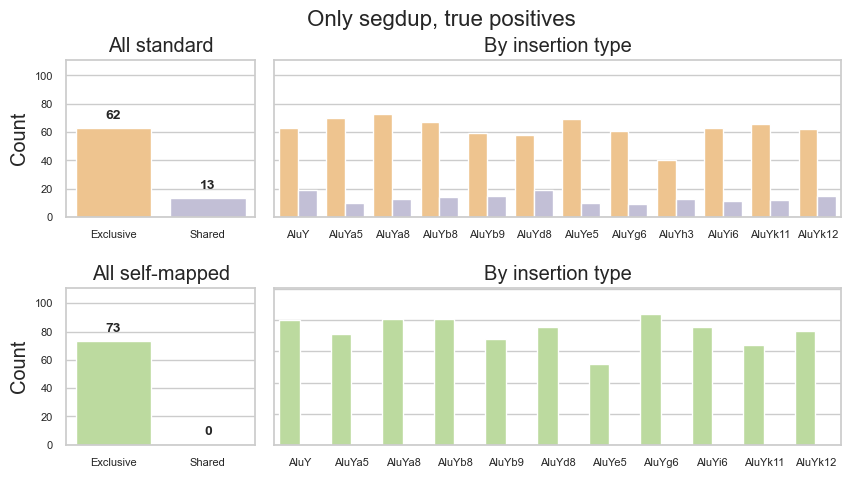

In [28]:
# Prepare TP data
tp_cols = ['tp_exclusive', 'tp_shared']
tp_melted = combined_df.melt(
    id_vars=['insertion_type', 'experiment'],
    value_vars=tp_cols,
    var_name='tp_type',
    value_name='count'
)

tp_melted['tp_type'] = tp_melted['tp_type'].map({
    'tp_exclusive': 'Exclusive',
    'tp_shared': 'Shared'
})


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5), gridspec_kw={'width_ratios': [1, 3], 'wspace': 0.05, 'hspace': 0.45})

for row in ax:
    for subplot in row:
        subplot.tick_params(axis='both', labelsize=8)

g1 = sns.barplot(data=tp_melted.query('experiment == "Standard"'), x='tp_type', y='count',
            hue='tp_type', palette='PuOr', ax=ax[0,0], errorbar = None, legend = False)
ax[0,0].set_title('All standard')
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Count')
ax[0,0].set_ylim(0, 111)
ax[0,0].set_yticks(range(0, 111, 20))

for p in g1.patches:
    g1.annotate(format(int(p.get_height()), 'd'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize = 10,
                fontweight = '600')

g2 = sns.barplot(data=tp_melted.query('experiment == "Self-mapped"'), x='tp_type', y='count',
            hue='tp_type', palette='YlGn', ax=ax[1,0], errorbar = None, legend = False)
ax[1,0].set_title('All self-mapped')
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('Count')
ax[1,0].set_ylim(0, 111)
ax[1,0].set_yticks(range(0, 111, 20))

for p in g2.patches:
    g2.annotate(format(int(p.get_height()), 'd'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize = 10,
                fontweight = '600')

sns.barplot(data=tp_melted.query('experiment == "Standard"'), x='insertion_type', y='count',
            hue='tp_type', palette='PuOr', ax=ax[0,1], legend = False)
ax[0,1].set_title('By insertion type')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].set_ylim(0, 111)
ax[0,1].set_yticks(range(0, 111, 20))
ax[0,1].yaxis.set_tick_params(labelcolor='none')

sns.barplot(data=tp_melted.query('experiment == "Self-mapped"'), x='insertion_type', y='count',
            hue='tp_type', palette='YlGn', ax=ax[1,1], legend = False)
ax[1,1].set_title('By insertion type')
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')
ax[1,1].set_ylim(0, 101)
ax[1,1].set_yticks(range(0, 111, 20))
ax[1,1].yaxis.set_tick_params(labelcolor='none')

plt.suptitle(f"{experiment_title}, true positives", fontsize = 16)

plt.savefig(f"{figure_path_prefix}_true_positives.png", 
            dpi=300,
            transparent = True)

pdf_path = f"{figure_path_prefix}_true_positives.pdf"
pdf_files.append(pdf_path)
plt.savefig(pdf_path, 
            transparent = True,
            bbox_inches=Bbox([[0.6,0], [9.25,5]]),
            format = 'pdf')

## 4. Mapping Quality Analysis

<Figure size 400x400 with 0 Axes>

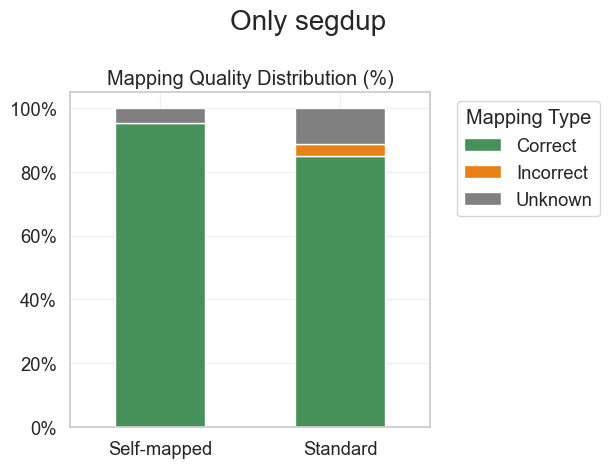

In [29]:
# Prepare mapping data
mapping_cols = ['mapping_unknown', 'mapping_correct', 'mapping_incorrect']
mapping_melted = combined_df.melt(
    id_vars=['insertion_type', 'experiment'],
    value_vars=mapping_cols,
    var_name='mapping_type',
    value_name='count'
)

mapping_melted['mapping_type'] = mapping_melted['mapping_type'].map({
    'mapping_unknown': 'Unknown',
    'mapping_correct': 'Correct',
    'mapping_incorrect': 'Incorrect'
})

# Create percentage stacked bar
mapping_pivot = mapping_melted.pivot_table(
    index='experiment',
    columns='mapping_type',
    values='count',
    aggfunc='mean'
)

mapping_pivot_pct = mapping_pivot.div(mapping_pivot.sum(axis=1), axis=0) * 100

plt.figure(figsize=(4,4))

b = mapping_pivot_pct.plot(kind='bar', stacked=True, color=['#46915a', '#e88113', 'gray'])
plt.title('Mapping Quality Distribution (%)')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('')
b.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(title='Mapping Type', bbox_to_anchor=(1.05, 1))
plt.grid(True, alpha=0.3)
plt.suptitle(f"{experiment_title}", fontsize = 20)

plt.tight_layout()

plt.savefig(f"{figure_path_prefix}_mapping_quality.png", 
            transparent = True,
            dpi=300)

pdf_path = f"{figure_path_prefix}_mapping_quality.pdf"
pdf_files.append(pdf_path)
plt.savefig(pdf_path, 
            transparent = True,
            format = 'pdf')

# 5. SVTYPE categorization

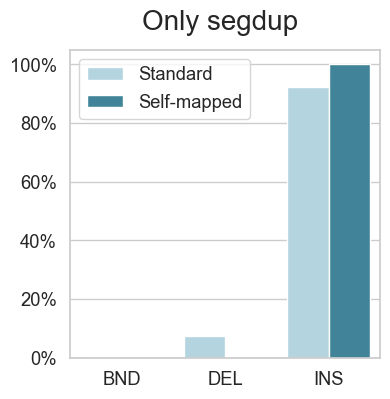

In [30]:
# Create lists for each column
svtypes = []
experiments = []
counts = []

# Add standard data
for svtype, count in standard_json['variant_characteristics']['by_svtype'].items():
    svtypes.append(svtype)
    experiments.append('Standard')
    counts.append(count)

# Add self-mapped data  
for svtype, count in self_map_json['variant_characteristics']['by_svtype'].items():
    svtypes.append(svtype)
    experiments.append('Self-mapped')
    counts.append(count)

# Create dataframe
df = pd.DataFrame({
    'svtype': svtypes,
    'experiment': experiments, 
    'count': counts
})
df['percentage'] = df.groupby('experiment')['count'].transform(lambda x: x / x.sum())*100

fig, ax = plt.subplots(figsize = (4,4))
sns.barplot(x = 'svtype', y = 'percentage', data = df, hue = 'experiment', palette = exp_palette, ax = ax)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(title = '')
ax.set_xlabel('')
ax.set_ylabel('')


plt.suptitle(f"{experiment_title}", fontsize = 20)

plt.savefig(f"{figure_path_prefix}_svtype_distribution.png", 
            transparent = True,
            bbox_inches = Bbox([[-0.5,0], [4,4]]),
            dpi=300)

pdf_path = f"{figure_path_prefix}_svtype_distribution.pdf"
pdf_files.append(pdf_path)
plt.savefig(pdf_path, 
            transparent = True,
            bbox_inches = Bbox([[-0.5,0], [4,4]]),
            format = 'pdf')


# 6. Read Reuse Analysis

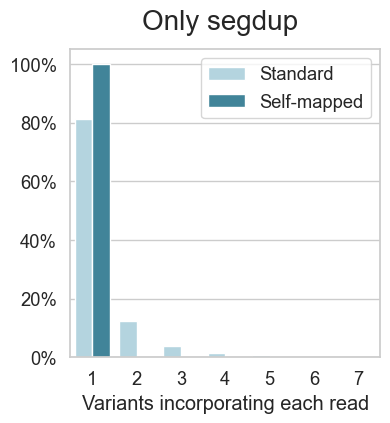

In [31]:
# Get distributions
std_dist = standard_json['nova_read_reuse']['usage_distribution']
self_dist = self_map_json['nova_read_reuse']['usage_distribution']

# Create lists for dataframe
experiments = []
usage_distributions = []
counts = []

# Add standard data
for usage, count in std_dist.items():
    experiments.append('Standard')
    usage_distributions.append(int(usage))
    counts.append(count)

# Add self-mapped data
for usage, count in self_dist.items():
    experiments.append('Self-mapped')
    usage_distributions.append(int(usage))
    counts.append(count)

# Create dataframe
df = pd.DataFrame({
    'experiment': experiments,
    'usage_distribution': usage_distributions,
    'count': counts
})
df['percentage'] = df.groupby('experiment')['count'].transform(lambda x: x / x.sum())*100

fig, ax = plt.subplots(figsize=(4,4))

sns.barplot(x = 'usage_distribution', y = 'percentage', data = df, hue = 'experiment', palette = exp_palette, ax = ax)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('')
ax.set_xlabel('Variants incorporating each read')
ax.legend(title = '')

plt.suptitle(f"{experiment_title}", fontsize = 20)

plt.savefig(f"{figure_path_prefix}_read_reuse.png", 
            transparent = True,
            dpi=300)

pdf_path = f"{figure_path_prefix}_read_reuse.pdf"
pdf_files.append(pdf_path)
plt.savefig(pdf_path, 
            transparent = True,
            bbox_inches = Bbox([[-0.3,-0.3], [4,4]]),
            format = 'pdf')

# 7. Merge PDFs

In [32]:
merged_pdf = f"{figure_path_prefix}_figures.pdf"

writer = PdfWriter()
for pdf_file in pdf_files:
    writer.append(pdf_file)

writer.write(merged_pdf)
writer.close()

print(f"Merged PDF saved to {merged_pdf}")

Merged PDF saved to /Users/stacy/Documents/GitHub/nova/figures/alu_segdups/only_segdup_figures.pdf



1. **Self-mapped approach shows better performance across all metrics**:
   - Notably higher precision (89.96% vs 79.84%)
   - Better recall (94.16% vs 87.26%)
   - Improved F1 score (0.92 vs 0.83)

1. **Performance Metrics by Subfamily**:
   - Self-mapped approach shows more consistent performance across Alu subfamilies
   - Lower variance in both recall and precision metrics
   - Particularly improved performance on challenging subfamilies like AluYh3

3. **False Positive Patterns**:
   - Self-mapped approach shows significant reduction in mapping errors
   - More consistent handling of multi-read cases
   - Lower overall false positive rates across all categories

4. **True Positive Analysis**:
   - Self-mapped approach has higher exclusive true positives
   - Standard approach shows more shared true positives
   - More consistent true positive rates across subfamilies in self-mapped

5. **Mapping Quality**:
   - Self-mapped approach shows dramatic improvement in mapping quality
   - Higher proportion of correct mappings
   - Fewer unknown and incorrect mappings

6. **Self-alignment reduces "read reuse"**:
   - Standard approach shows 18.9% of reads are "reused" in other variants
   - Self-mapped approach has 0% reuse rate, suggesting better read assignment